Work with the deepstack object detection API (Yolo-v3). Note that by default, the minimum confidence for detected objects is 0.45

In [4]:
import deepstack.core as ds
from PIL import Image
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#IP_ADDRESS = 'localhost'
IP_ADDRESS = '192.168.1.114' # pi
PORT = '5000'
API_KEY = ""# "Mysecretkey"
TIMEOUT = 30 # Default is 10

In [32]:
ls

README.md                     usage-face-recognition.ipynb
test-image3.jpg               usage-object-detection.ipynb


## Object detection

In [33]:
dsobject = ds.DeepstackObject(IP_ADDRESS, PORT, API_KEY, TIMEOUT)

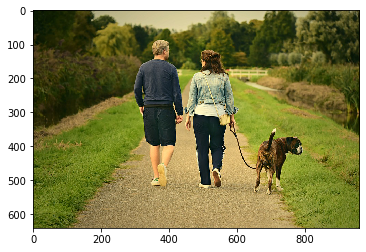

In [34]:
image_path = 'test-image3.jpg'

plt.imshow(Image.open(image_path));

Perform object detection - can be slow

In [37]:
%%time
try:
    with open(image_path, 'rb') as image_bytes:
        dsobject.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 5.52 ms, sys: 3.4 ms, total: 8.92 ms
Wall time: 1.43 s


Access the predictions

In [38]:
dsobject.predictions

[{'confidence': 0.86829805,
  'label': 'person',
  'y_min': 97,
  'x_min': 289,
  'y_max': 485,
  'x_max': 441},
 {'confidence': 0.9552736,
  'label': 'person',
  'y_min': 133,
  'x_min': 435,
  'y_max': 498,
  'x_max': 592},
 {'confidence': 0.9736693,
  'label': 'dog',
  'y_min': 326,
  'x_min': 645,
  'y_max': 486,
  'x_max': 788}]

In [39]:
len(dsobject.predictions)

3

## Helper functions
The package provides helper functions for extracting info out of deepstack predictions

Get the set objects

In [19]:
ds.get_objects(dsobject.predictions)

['dog', 'person']

Get a summary of the number of occurances of objects

In [20]:
summary = ds.get_objects_summary(dsobject.predictions)
summary

{'dog': 1, 'person': 2}

Get a list of confidences for a single object type, e.g. `person`

In [21]:
person_confidences = ds.get_object_confidences(dsobject.predictions, 'person')
person_confidences

[0.9998661, 0.9996547]

Get the list of confidences above some threshold value, useful for counting

In [22]:
CONFIDENCE_THRESHOLD = 0.9997
len(ds.get_confidences_above_threshold(person_confidences, CONFIDENCE_THRESHOLD))

1